<a href="https://colab.research.google.com/github/tejasrinainala/audio-analysis-infosys-springboard/blob/main/Audio_Preprocessing_Pipeline_and_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Preprocessing Pipeline

## Introduction
Audio preprocessing is an essential step in speech and audio-based machine learning systems. Raw audio signals often contain silence, varying amplitude levels, and noise, which can negatively impact feature extraction and model performance. Preprocessing helps clean and standardize audio data, making it suitable for further analysis.

## Task Description
The objective of this task is to build an audio preprocessing pipeline using a publicly available human speech dataset. The dataset is collected from OpenSLR (LibriSpeech). The audio files are loaded into Google Colab, preprocessed using standard techniques, and analyzed using visualization methods to understand the difference between raw and preprocessed audio.



## Workflow / Steps Followed

1. Collected a publicly available human speech dataset (LibriSpeech) from OpenSLR.
2. Uploaded a subset of audio files (.flac format) into Google Colab.
3. Loaded the raw audio files using the Librosa library.
4. Applied audio preprocessing techniques such as normalization and silence removal.
5. Saved the preprocessed audio files for comparison.
6. Extracted MFCC features from the preprocessed audio.
7. Compared unprocessed and preprocessed audio using audio playback.
8. Visualized the audio signals using waveforms, spectrograms, and MFCC plots.



In [ ]:
from google.colab import files
files.upload()


In [24]:
!ls


174-50561-0000.flac  174-50561-0018.flac  84-121123-0015.flac
174-50561-0001.flac  174-50561-0019.flac  84-121123-0016.flac
174-50561-0002.flac  174-50561.trans.txt  84-121123-0017.flac
174-50561-0003.flac  84-121123-0000.flac  84-121123-0018.flac
174-50561-0004.flac  84-121123-0001.flac  84-121123-0019.flac
174-50561-0005.flac  84-121123-0002.flac  84-121123-0020.flac
174-50561-0006.flac  84-121123-0003.flac  84-121123-0021.flac
174-50561-0007.flac  84-121123-0004.flac  84-121123-0022.flac
174-50561-0008.flac  84-121123-0005.flac  84-121123-0023.flac
174-50561-0009.flac  84-121123-0006.flac  84-121123-0024.flac
174-50561-0010.flac  84-121123-0007.flac  84-121123-0025.flac
174-50561-0011.flac  84-121123-0008.flac  84-121123-0026.flac
174-50561-0012.flac  84-121123-0009.flac  84-121123-0027.flac
174-50561-0013.flac  84-121123-0010.flac  84-121123-0028.flac
174-50561-0014.flac  84-121123-0011.flac  84-121123.trans.txt
174-50561-0015.flac  84-121123-0012.flac  preprocessed_audio
174-50561

## Dataset Loading
The selected audio files were manually uploaded from the LibriSpeech dev-clean dataset. Each file is a human speech recording in `.flac` format. These audio files serve as the raw, unprocessed input for the preprocessing pipeline.



In [25]:
import os
files = sorted([f for f in os.listdir() if f.endswith(".flac")])
files = files[:30]
print("Total files used for preprocessing:", len(files))

Total files used for preprocessing: 30


In [26]:
import librosa
import librosa.effects as effects
import numpy as np
import soundfile as sf
import os

os.makedirs("preprocessed_audio", exist_ok=True)

files = [f for f in os.listdir() if f.endswith(".flac")]



for i, file in enumerate(files):
    y, sr = librosa.load(file, sr=16000)

    # Normalize
    y = y / np.max(np.abs(y))

    # Remove silence
    y, _ = effects.trim(y)

    sf.write(f"preprocessed_audio/audio_{i}.wav", y, sr)


In [27]:
from IPython.display import Audio

print("Original (Unprocessed) Audio")
Audio(files[5])


Original (Unprocessed) Audio


In [28]:
print("Preprocessed Audio")
Audio("preprocessed_audio/audio_5.wav")


Preprocessed Audio


## Difference Between Original and Preprocessed Audio
The original audio contains silence at the beginning and end and may have uneven amplitude levels. After preprocessing, silence is removed and the audio amplitude is normalized. This makes the audio cleaner and more suitable for further analysis and feature extraction.


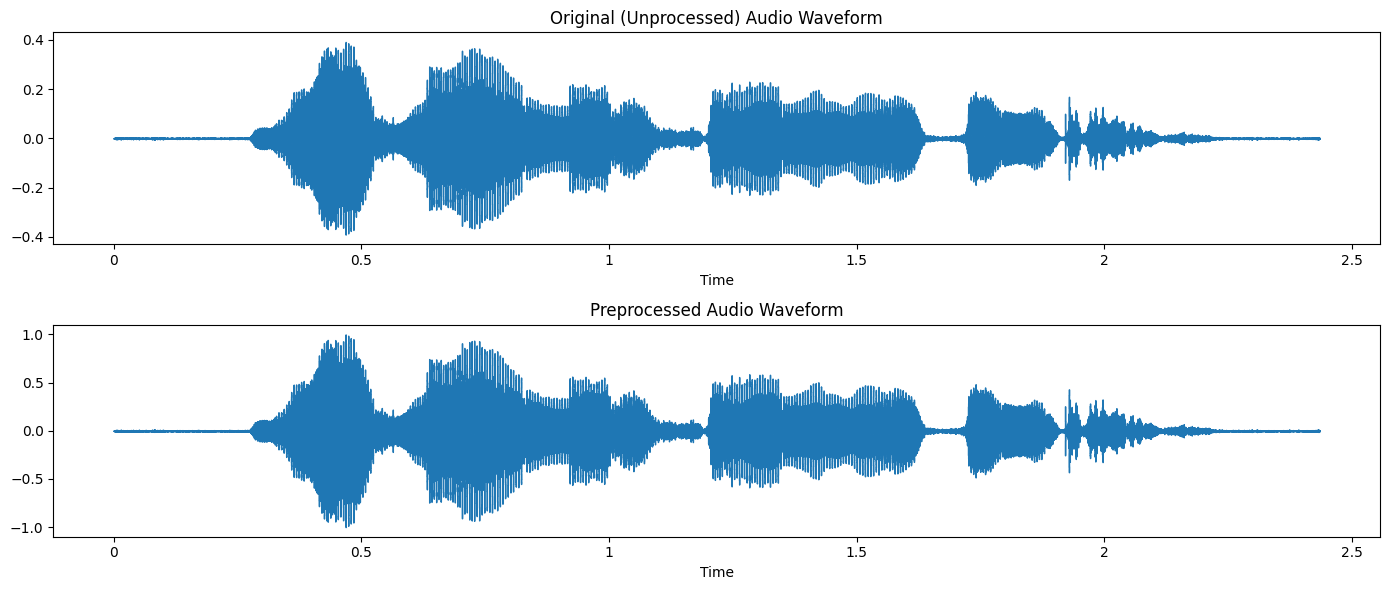

In [29]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Reload audio file list safely
audio_files = [f for f in os.listdir() if f.endswith(".flac")]

# Load original and preprocessed audio
y_orig, sr = librosa.load(audio_files[0], sr=16000)
y_clean, sr = librosa.load("preprocessed_audio/audio_0.wav", sr=16000)

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y_orig, sr=sr)
plt.title("Original (Unprocessed) Audio Waveform")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_clean, sr=sr)
plt.title("Preprocessed Audio Waveform")

plt.tight_layout()
plt.show()


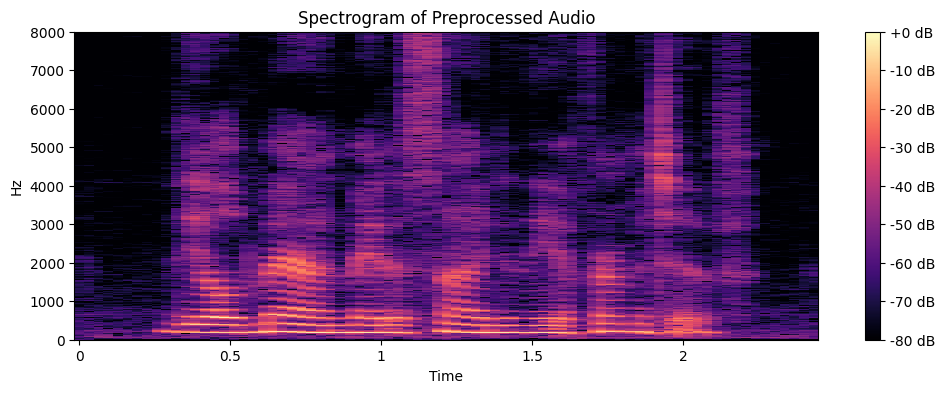

In [30]:
import numpy as np

D = librosa.amplitude_to_db(
    np.abs(librosa.stft(y_clean)), ref=np.max
)

plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Preprocessed Audio")
plt.show()


In [31]:
import librosa.feature as lf

mfcc_list = []

for file in files:
    y, sr = librosa.load(file, sr=16000)
    y = y / np.max(np.abs(y))
    y, _ = effects.trim(y)

    mfcc = lf.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_list.append(mfcc)

print("MFCC extracted for", len(mfcc_list), "files")


MFCC extracted for 49 files


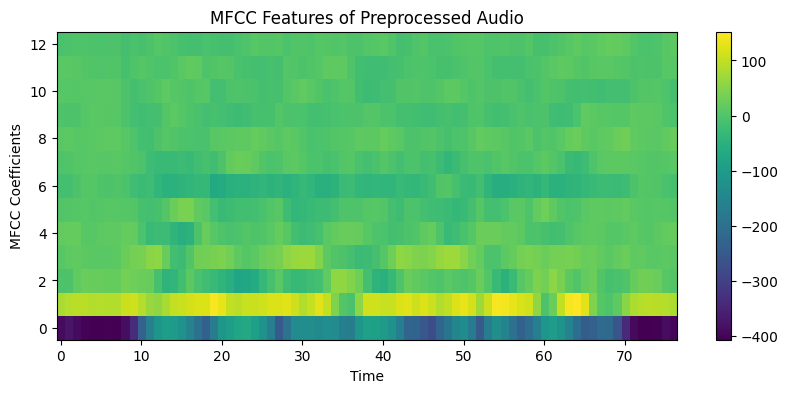

In [32]:
plt.figure(figsize=(10, 4))
plt.imshow(mfcc_list[0], aspect='auto', origin='lower')
plt.colorbar()
plt.title("MFCC Features of Preprocessed Audio")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()


## Preprocessing Conclusion

In this project, an audio preprocessing pipeline was successfully implemented using a subset of the LibriSpeech dataset. Raw speech audio files were loaded and preprocessed using normalization and silence removal techniques. The difference between unprocessed and preprocessed audio was demonstrated through audio playback and waveform visualization. Spectrogram and MFCC visualizations provided insights into the frequency and feature-level representation of speech signals. The preprocessing pipeline prepares the audio data for further speech analysis and machine learning applications.



# Modelling
## Objective of Modelling
The objective of this stage is to apply Automatic Speech Recognition (ASR) models on preprocessed audio data and compare different ASR approaches. Based on the comparison, the most suitable model is selected for the final pipeline.


## Introduction to Automatic Speech Recognition (ASR)

Automatic Speech Recognition (ASR) is a technology that converts spoken audio into written text. In audio-based machine learning systems, ASR models are applied after preprocessing to extract meaningful textual information from speech signals.


## ASR Models Considered

### Kaldi ASR
Kaldi is a research-oriented ASR toolkit that provides extensive control over acoustic and language models. However, it requires complex setup, detailed configuration, and expert knowledge, making it unsuitable for quick implementation in this project.

### Hugging Face ASR Models
Hugging Face provides transformer-based ASR models such as Wav2Vec 2.0. These models achieve high accuracy but require more dependencies, higher computational resources, and careful configuration.

### Whisper ASR
Whisper is a pre-trained, end-to-end ASR model developed by OpenAI. It is robust to noisy audio, requires minimal preprocessing, and is easy to integrate, making it suitable for real-world speech recognition tasks.


## Modelling Strategy

To perform ASR modelling and comparison, one non-Whisper ASR model and the Whisper ASR model are applied to the same preprocessed audio. The outputs are compared based on ease of use and robustness, and the most suitable model is selected.


In [ ]:
!pip install transformers torchaudio


In [34]:
from transformers import pipeline

hf_asr = pipeline(
    "automatic-speech-recognition",
    model="facebook/wav2vec2-base-960h"
)

hf_result = hf_asr("preprocessed_audio/audio_5.wav")

print("Hugging Face ASR Output:")
print(hf_result["text"])


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


Hugging Face ASR Output:
AND THE CRY ISSUED FROM HIS PORS IF WE MAY THUS SPEAK A CRY FRIGHTFUL IN ITS SILENCE


In [ ]:
!pip install openai-whisper


In [36]:
import whisper

whisper_model = whisper.load_model("small")

whisper_result = whisper_model.transcribe("preprocessed_audio/audio_5.wav")

print("Whisper ASR Output:")
print(whisper_result["text"])


/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Whisper ASR Output:
 and the cry issued from his pourers, if we may thus speak, a cry frightful in its silence.


## Comparison of ASR Models

Both Hugging Face Wav2Vec 2.0 and Whisper ASR models were applied to the same preprocessed audio. While the Hugging Face model provides accurate transcription, it requires additional dependencies and careful configuration. Whisper demonstrates better robustness to noisy audio and is easier to integrate. Based on these observations, Whisper is selected as the final ASR model.


## Final Conclusion

In this project, an end-to-end audio processing pipeline was developed starting from audio preprocessing to ASR modelling. After preprocessing the audio data, two ASR models were applied and compared. Based on robustness, ease of use, and performance on noisy speech, Whisper was selected as the final ASR model. This project demonstrates a complete and practical audio processing and speech recognition pipeline.
